# **Waste Material Segregation for Improving Waste Management**
### **Developed By - Sagnik Saha**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [4]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [5]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Load the dataset.

In [6]:
# Load and unzip the dataset
import zipfile
import os

zip_filename = 'data.zip'
extract_path ='/content/'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images
def load_images(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip if directory not exists

        for image in os.listdir(class_path):
            img_path = os.path.join(class_path, image)

            # Check if it's not an image file
            if not os.path.isfile(img_path):
                continue

            try:
                img = Image.open(img_path).convert('RGB')
                img_arr = np.array(img)
                images.append(img_arr)
                labels.append(class_to_label[class_name])
            except Exception as e:
                print(f"Failed to load image: {img_path} – {e}")

    images = np.array(images)
    labels = np.array(labels)

    print(f"Loaded {len(images)} images from {len(class_names)} classes.")
    return images, labels, class_names

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [8]:
# Get the images and their labels
data_dir='/content/data'
images, labels, class_names = load_images(data_dir)
print("Classes:", class_names)

Loaded 7625 images from 7 classes.
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

        Class  Count
0   Cardboard    540
1  Food_Waste   1000
2       Glass    750
3       Metal   1000
4       Other   1010
5       Paper   1030
6     Plastic   2295


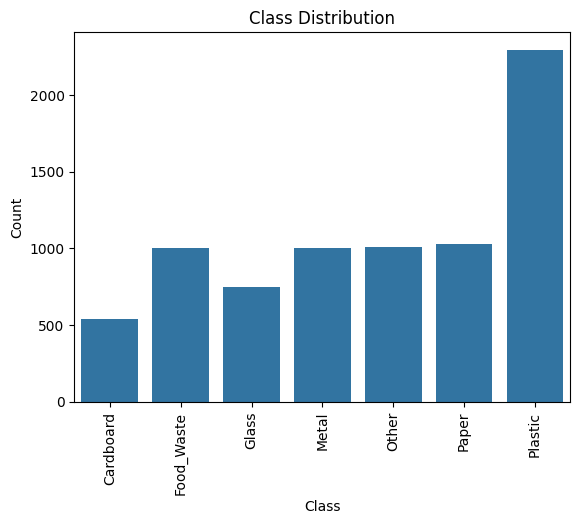

In [9]:
# Visualise Data Distribution

img_class, counts = np.unique(labels, return_counts=True)
data = pd.DataFrame({
    'Class': [class_names[i] for i in img_class],
    'Count': counts
})
print(data)
sns.barplot(x='Class', y='Count', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

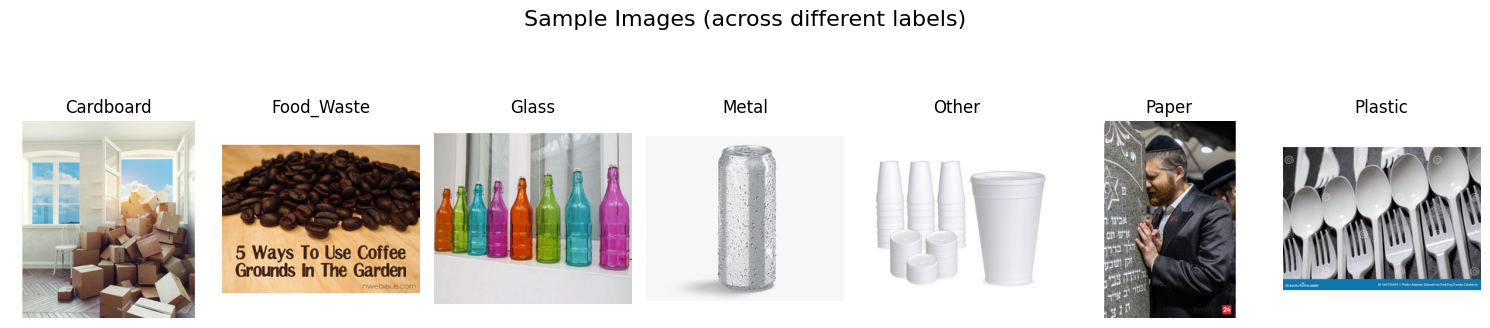

In [10]:
# Visualise Sample Images (across different labels)

num_samples = 7

plt.figure(figsize=(15, 4))

for i, class_name in enumerate(class_names[:num_samples]):
    class_idx = i  # label of the current class
    class_images = images[labels == class_idx]  # images for this class_idx
    random_img = class_images[np.random.randint(len(class_images))]

    # Plot the image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(random_img)
    plt.title(f"{class_name}")
    plt.axis('off')

plt.suptitle("Sample Images (across different labels)", fontsize=16)
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [11]:
# Find the smallest and largest image dimensions from the data set

image_shapes = [img.shape[:2] for img in images]
image_shapes = np.array(image_shapes)
min_height, min_width = image_shapes.min(axis=0)
max_height, max_width = image_shapes.max(axis=0)

print(f"Smallest image dimensions: {min_width} x {min_height}")
print(f"Largest image dimensions: {max_width} x {max_height}")

Smallest image dimensions: 256 x 256
Largest image dimensions: 256 x 256


In [12]:
# Resize the image dimensions
target_img_size=(128, 128)
resized_images = []

for img in images:
    img = Image.fromarray(img)
    resized_image = img.resize(target_img_size)
    resized_images.append(np.array(resized_image))

resized_images = np.array(resized_images)

print(f"Resized images to: {target_img_size}")
print(f"Shape of resized images: {resized_images.shape}")

Resized images to: (128, 128)
Shape of resized images: (7625, 128, 128, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [13]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_encoded = tf.keras.utils.to_categorical(y_encoded, len(class_names))
y_encoded.shape

(7625, 7)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [14]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val, y_train, y_val = train_test_split(resized_images, y_encoded, test_size=0.2, random_state=42)


print(f'Training dataset size:{len(X_train)}')
print(f'Validation dataset size:{len(X_val)}')

X_train = X_train/255.0 # Normalize the training images
X_val = X_val/255.0 # Normalize the validation images

Training dataset size:6100
Validation dataset size:1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

input_shape = (128, 128, 3)

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten()) # Flatten the output from the convolutional layers

# Fully Connected Layers
model.add(Dropout(0.5)) # Dropout to prevent overfitting
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\S875586\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │       175,623 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,767 (1.03 MB)

 Trainable params: 269,319 (1.03 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - accuracy: 0.2759 - loss: 4.6585 - val_accuracy: 0.1528 - val_loss: 2.6977 - learning_rate: 5.0000e-04
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.3520 - loss: 3.1978 - val_accuracy: 0.1423 - val_loss: 3.2129 - learning_rate: 5.0000e-04
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 338ms/step - accuracy: 0.3746 - loss: 2.8389 - val_accuracy: 0.2636 - val_loss: 2.9806 - learning_rate: 5.0000e-04
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.3987 - loss: 2.5270 - val_accuracy: 0.2420 - val_loss: 2.6234 - learning_rate: 5.0000e-04
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 242ms/step - accuracy: 0.4512 - loss: 1.9883 - val_accuracy: 0.3993 - val_loss: 1.7423 - learning_rate: 5.0000e-04
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.4461 - loss: 1.6834 - val_accuracy: 0.4505 - val_loss: 1.5110 - learning_rate: 5.0000e-04
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 24

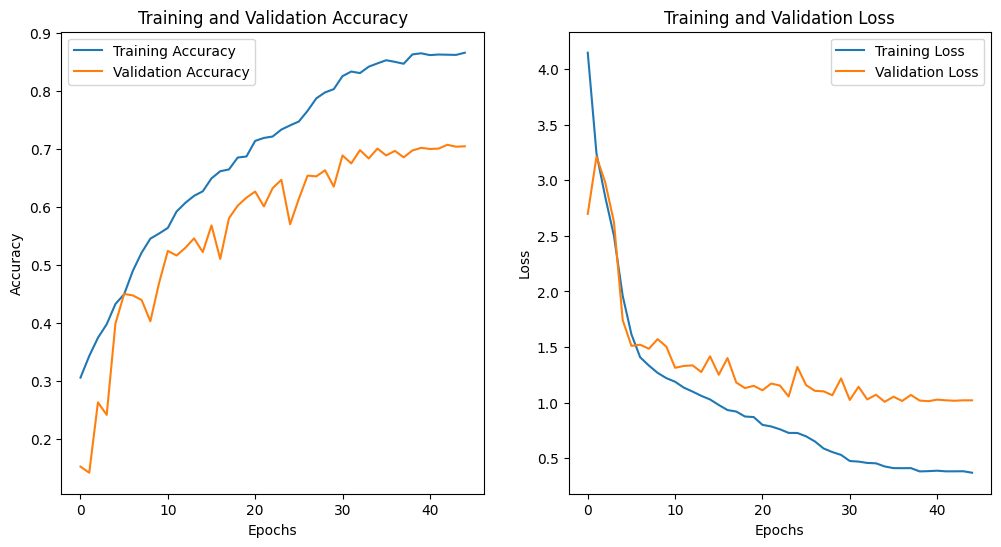

In [16]:
# Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)


# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Plot the training and validation loss/accuracy
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7105 - loss: 0.9713

Test Accuracy: 0.7009835839271545
Test Loss:     1.00770902633667
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.82      0.80      0.81       122
  Food_Waste       0.71      0.75      0.73       209
       Glass       0.65      0.67      0.66       163
       Metal       0.82      0.67      0.74       196
       Other       0.58      0.58      0.58       194
       Paper       0.61      0.63      0.62       195
     Plastic       0.73      0.76      0.75       446

    accuracy                           0.70      1525
   macro avg       0.70      0.69      0.70      1525
weighted avg       0.70      0.70      0.70      1525



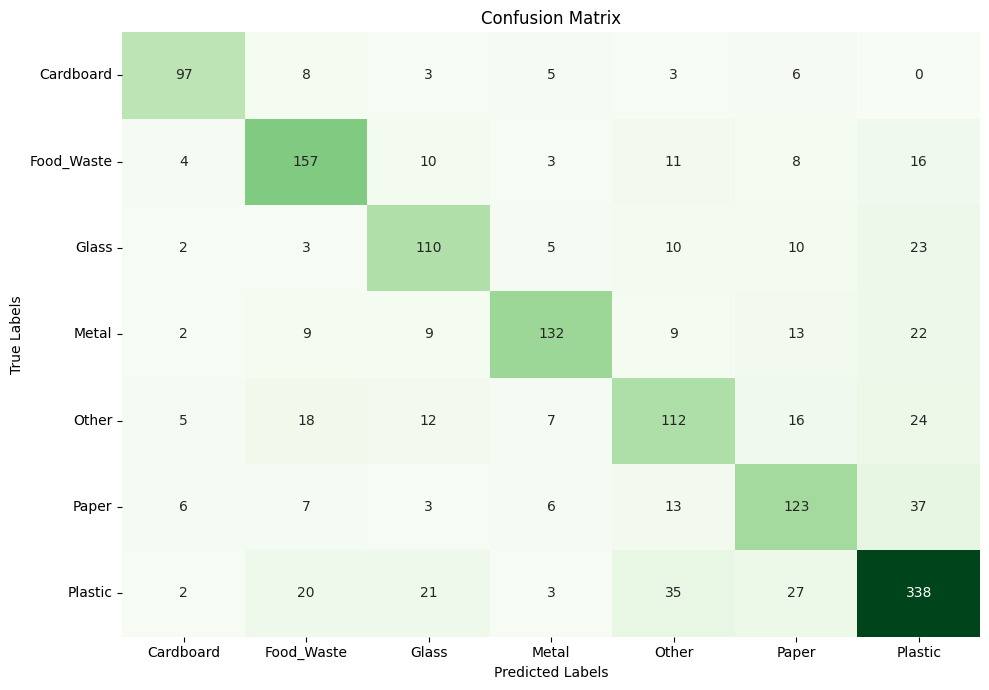

In [17]:
# Evaluate on the test set; display suitable metrics

test_loss, test_acc = model.evaluate(X_val, y_val, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)


y_true = np.argmax(y_val, axis=1)
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


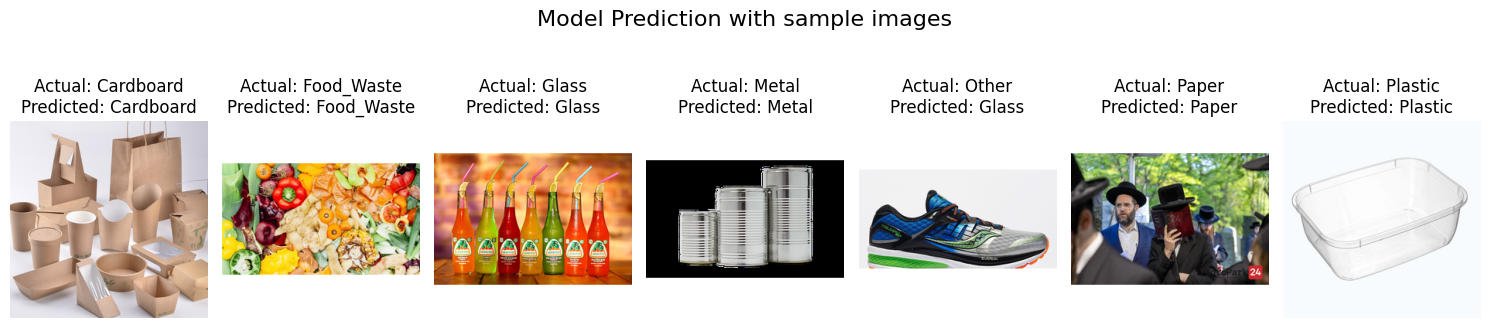

In [18]:
# Model prediction on sample images
import cv2

def predict_func(img): 
    #plt.figure(figsize=(6,4))
    #plt.imshow(img)
    #plt.tight_layout()
    img = img/255.0  # Normalize the image
    img = cv2.resize(img, (128, 128))
    img = np.reshape(img, [-1, 128, 128, 3])
    result = np.argmax(model.predict(img))
    #print(class_names[result])
    return result

plt.figure(figsize=(15, 4))

for idx, img in enumerate(class_names):
    class_images = images[labels == idx]  # images for this class_idx
    random_img = class_images[np.random.randint(len(class_images))]
    
    # Plot the image
    plt.subplot(1, len(class_names), idx + 1)
    plt.imshow(random_img)
    plt.axis('off')
    actual_label = class_names[idx]
    pred_idx = predict_func(random_img)
    pred_label = class_names[pred_idx]
    plt.title(f"Actual: {actual_label}\nPredicted: {pred_label}")
    
plt.suptitle("Model Prediction with sample images", fontsize=16)
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [19]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [20]:
# Create a function to augment the images




In [21]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [22]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

### **Report your findings about the data**

1. The dataset contained **7,625 images** classified into **7 classes** ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic'].
2. There is a **class imbalance**, where the **"Plastic"** class had **more than 2,000 images**, while all other classes had **1,000 or fewer**.
3. All images were of dimensions **256 × 256** pixels.
4. All images resized to 128x128 to improve computational efficiency.
5. Dataset is split into 80% traning and 20% validation 
    - Training dataset size: 6100 images
    - Validation dataset size: 1525 images


### **Report model training results**

**Model Architecture**
- 3 **convolutional layers** with batch normalization, max pooling, and increasing dropout rates (0.2, 0.3, 0.4, 0.5).
- **Input size:** 128x128x3 RGB images.
- **Optimizer:** Adam (learning rate 0.0005).
- **Total parameters:** ~270K.
    - Total params: 269,767
    - Trainable params: 269,319
    - Non-trainable params: 448
- Fully connected output layer with softmax activation for 7 classes.

**Model Training**
- **Early stopping** and **learning rate reduction** callbacks helped prevent overfitting and stabilized training.
- Training and validation accuracy/loss plotted for monitoring.
- Model trained on 6,100 images, validated on 1,525 images.

**Evaluation**
- The CNN model achieved **70% accuracy** in classifying waste materials into seven categories.
- Accuracy and loss reported for both training and validation sets.
- The model performed best on "Cardboard" and "Metal" classes, with f1-scores above 0.74, while "Other" and "Paper" classes had lower scores, indicating room for improvement.
- Class imbalance was observed, with the "Plastic" class dominating the dataset. This affected the recall and precision for minority classes such as "Other" and "Paper".
- Classification report and confusion matrix generated for detailed performance analysis & future improvements.

```
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.82      0.80      0.81       122
  Food_Waste       0.71      0.75      0.73       209
       Glass       0.65      0.67      0.66       163
       Metal       0.82      0.67      0.74       196
       Other       0.58      0.58      0.58       194
       Paper       0.61      0.63      0.62       195
     Plastic       0.73      0.76      0.75       446

    accuracy                           0.70      1525
   macro avg       0.70      0.69      0.70      1525
weighted avg       0.70      0.70      0.70      1525
```